## Clustering
-  clustering is the task of partitioning the dataset into groups,
called **clusters**. The goal is to split up the data in such a way that points within a single
cluster are very similar and points in different clusters are different. Similarly to classification algorithms, 
clustering algorithms assign (or predict) a number to each data
point, indicating which cluster a particular point belongs to.

### k-Means Clustering
- k-Means clustering is one of the simplest and most commonly used clustering algorithms. 
It tries to find cluster centers that are representative of certain regions of the
data.



- The algorithm alternates between two steps: assigning each data point to the closest
cluster center, and then setting each cluster center as the mean of the data points that
are assigned to it.




- The algorithm is finished when the assignment of instances to clusters no longer
changes.


- Given new data points, k-Means will assign them to the closest cluster center. 

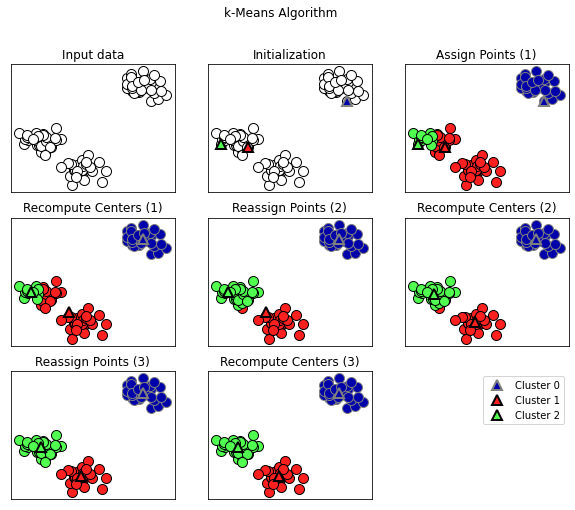

In [1]:
import mglearn
import matplotlib.pyplot as plt

mglearn.plots.plot_kmeans_algorithm()
plt.suptitle("k-Means Algorithm")
plt.show()

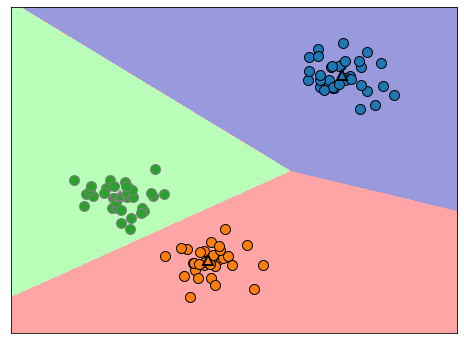

In [2]:
# Here are the boundaries of the cluster centers that were learned in the diagram above:
plt.figure(figsize = (8, 6))
mglearn.plots.plot_kmeans_boundaries()

## Implementing k-Means in scikit learn

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# load the make_blobs data 
X, y = make_blobs(random_state = 1)


# instantiate the k-Means algorithm with 3 clusters


# train it on the training features


In [2]:
# check the dimension of the data


In [3]:
# get the labels associated with each data point


# get the cluster centers



## Visualizing k-Means

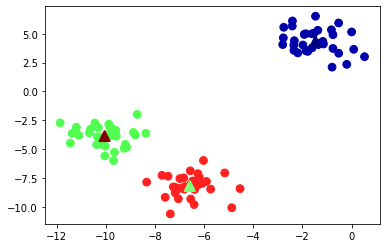

In [32]:
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_, s = 60, cmap = mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 100, 
           marker = '^', linewidth = 2, cmap = 'jet', c = [0, 1, 2])

plt.show()

### Trying other number of clusters

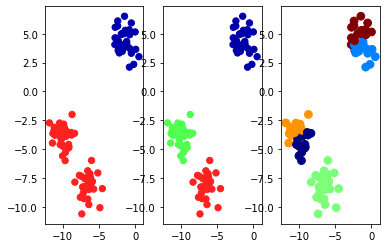

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3)

# using two clusters
kmeans_2 = KMeans(n_clusters=2)
kmeans_2.fit(X)

ax[0].scatter(X[:, 0], X[:, 1], c = kmeans_2.labels_, s = 40, cmap = mglearn.cm2)

# using 3 clusters
kmeans_3 = KMeans(n_clusters=3)
kmeans_3.fit(X)

ax[1].scatter(X[:, 0], X[:, 1], c = kmeans_3.labels_, s = 40, cmap = mglearn.cm3)

# using 5 clusters
kmeans_5 = KMeans(n_clusters=5)
kmeans_5.fit(X)

ax[2].scatter(X[:, 0], X[:, 1], c = kmeans_5.labels_, s = 60, cmap = 'jet')

plt.show()

## Failure of k-Means
- k-Means perform poorly when the clusters have complex shapes.

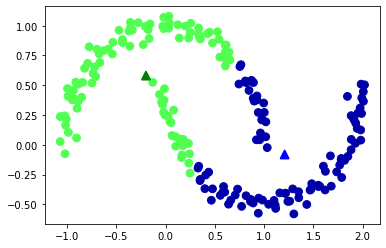

In [34]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)

# instantiate the clustering algorithm with 2 clusters

kmeans = KMeans(n_clusters=2)

kmeans.fit(X)
y_pred = kmeans.predict(X)

# visualize the cluster label and the cluster centers
import matplotlib.pyplot as plt
import mglearn

plt.scatter(X[:, 0], X[:, 1], c = y_pred, s = 60, cmap = mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 60, marker = '^',
           linewidths=2, cmap = mglearn.cm3, c = ['b', 'g'])
plt.show()

## Imbalanced Datasets
- Datasets in which one class is much more frequent than the other are often called imbalanced
dataset, or datasets with imbalanced classes.In reality, imbalanced data is the norm, and it is rare that the events of interest have
equal or even similar frequency in the data. The most common classifier used for imbalanced data or just to get a baseline model is called **Dummy Classifier**

### Dummy Classifier
- A dummy classifier is a type of classifier which does not generate any insight about the data and classifies the given data using only simple rules. The classifier’s behavior is completely independent of the training data as the trends in the training data are completely ignored and instead uses one of the strategies to predict the class label.
It is used only as a simple baseline for the other classifiers i.e. any other classifier is expected to perform better on the given dataset. It is especially useful for datasets where are sure of a class imbalance. It is based on the philosophy that any analytic approach for a classification problem should be better than a random guessing approach.



- Below are a few strategies used by the dummy classifier to predict a class label:
    - **Most Frequent**: The classifier always predicts the most frequent class label in the training data.
    - **Stratified**: It generates predictions by respecting the class distribution of the training data. It is different from the “most frequent” strategy as it instead associates a probability with each data point of being the most frequent class label.
    - **Uniform**: It generates predictions uniformly at random.
    - **Constant**: The classifier always predicts a constant label and is primarily used when classifying non-majority class labels.

## Implementing the Dummy classifier in scikit learn
- Here, we will use the digits data set in scikit learn
- Our baseline model produces about 90% accuracy.

In [4]:
from sklearn.datasets import load_digits
from sklearn.dummy import DummyClassifier

# Load the digits data



# check the components in the data



# get the features and the target(target = 9)


# split the data into training and testing set


# instantiate the classifier
#dummy = DummyClassifier(strategy='most_frequent', random_state=0)


# train the model


# get the accuracy
#print("Test accuracy: {:.3f}".format(dummy.score(X_test, y_test)))

### Trying other classifiers

In [40]:
# fit the logistic regression
from sklearn.linear_model import LogisticRegression

# instantiate the model with C = 0.1 and 1000 iterations
logreg = LogisticRegression(C = 0.1, max_iter=1000)

# train the model
logreg.fit(X_train, y_train)

print("Test accuracy: {:.3f}".format(logreg.score(X_test, y_test)))

Test accuracy: 0.984


## Building Pipelines
-  The Pipeline class is a class that allows "gluing" together multiple processing steps into a single scikit-learn estimator.
The Pipeline class itself has fit, predict and score methods and behaves just like
any other model in scikit-learn. The most common use-case of the pipeline class is in
chaining preprocessing steps (like scaling of the data) together with a supervised
model like a classifier.

### Example of using Pipelines in scikit-learn
-  use the Pipeline to express the work-flow for training an
SVM after scaling the data MinMaxScaler (for now without the grid-search). First, we
build a pipeline object, by providing it with a list of steps. Each step is a tuple containing a 
name (any string of your choosing) and an instance of an estimator.

## Naive way of building a model and doing parameter selection

In [41]:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# load the data
cancer = load_breast_cancer()

# split the data
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

# scale the data using MinMax Scaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# fit an SVC model
from sklearn.svm import SVC
svc = SVC(random_state = 0)
svc.fit(X_train_scaled, y_train)

# get the accuracy
print("SVC test score: {:.3f}".format(svc.score(X_test_scaled, y_test)))

SVC test score: 0.972


In [42]:
# Parameter Selection and Preprocessing
from sklearn.model_selection import GridSearchCV

# set the values of the parameter to search through
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

# instantiate and the train the grid search model
grid = GridSearchCV(SVC(), param_grid=param_grid, cv = 5)

# train the model
grid.fit(X_train_scaled, y_train)

# get the scores
print("Best score: {}".format(grid.best_score_))
print("Best parameter: {}".format(grid.best_params_))
print("Test score: {}".format(grid.score(X_test_scaled, y_test)))

Best score: 0.9812311901504789
Best parameter: {'C': 1, 'gamma': 1}
Test score: 0.972027972027972


## Implementing Pipeline

In [43]:
from sklearn.pipeline import Pipeline

# instantiate the pipeline
pipe = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC(random_state = 0))])

# train the pipeline
pipe.fit(X_train, y_train)

# evaluate on the test data
pipe.score(X_test, y_test)

0.972027972027972

## Using Pipeline with Grid search

In [45]:
# set the parameter values to search over
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
             'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

# instantiate the pipeline
pipe = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC())])

# implement grid search 
grid = GridSearchCV(pipe, param_grid = param_grid, cv = 5)

# train the model
grid.fit(X_train, y_train)

# get the scores
print("Best cross validation score: {}".format(grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))
print("Test score: {}".format(grid.score(X_test, y_test)))

Best cross validation score: 0.9812311901504789
Best parameters: {'svm__C': 1, 'svm__gamma': 1}
Test score: 0.972027972027972


## Exercise
- Using the cancer data, build a pipeline consisting of scaling the data, cross validation and building a machine
learning model for the problem.